In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [4]:
#import data set
df_all = pd.read_pickle(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/02 Data/Prepared Data/final_dataset.pkl')

In [5]:
df_all.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_prior_orders', 'order_frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'number_dependants',
       'family_status', 'income', 'region', 'low_order_flag', 'age_profile',
       'department', 'income_profile', 'family_profile'],
      dtype='object')

In [6]:
df_all.shape

(32406041, 37)

1. What are the busiest days of the week?

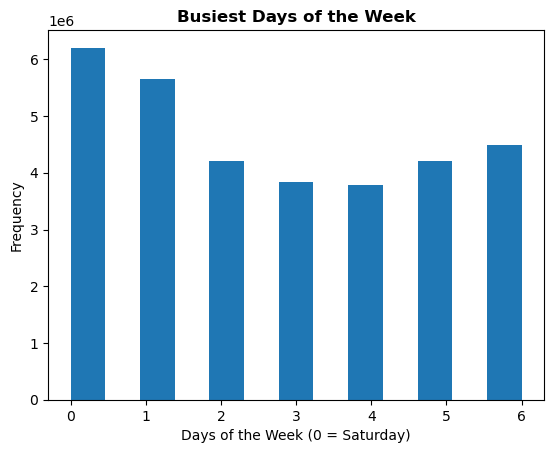

In [7]:
#bar chart
busiest_days = df_all['order_day_of_week'].plot.hist(bins = 13)
plt.title('Busiest Days of the Week', fontweight = 'bold')
plt.xlabel('Days of the Week (0 = Saturday)')
plt.show()

Saturday and Sunday are the busiest days of the week.

1B. What is the busiest hour of the day?

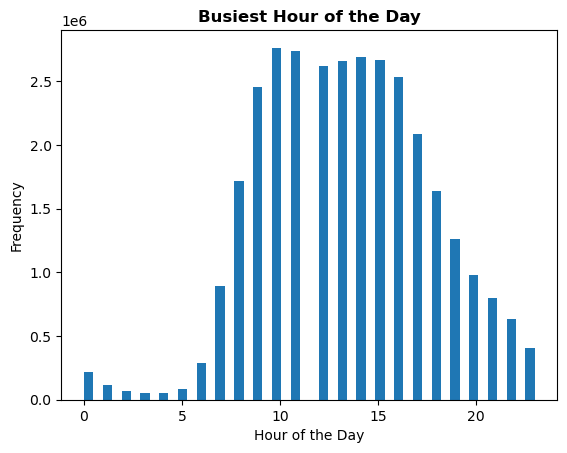

In [11]:
#bar chart
busiest_hours = df_all['order_hour_of_day'].plot.hist(bins = 48)
plt.title('Busiest Hour of the Day', fontweight = 'bold')
plt.xlabel('Hour of the Day')
plt.show()

2. Times of day when customers spend the most money

In [12]:
#Total price spent according to the time of day
busiest_hours_price = df_all.groupby('order_hour_of_day').agg({'prices' : ['sum']})
busiest_hours_price = busiest_hours_price.sort_values(by=('prices', 'sum'), ascending=False)
busiest_hours_price

,prices
,sum
order_hour_of_day,
11,33269266.7
10,32868936.5
15,32401489.5
16,31793883.0
14,31569899.5
12,31281010.8
13,30541991.2
9,28830546.9


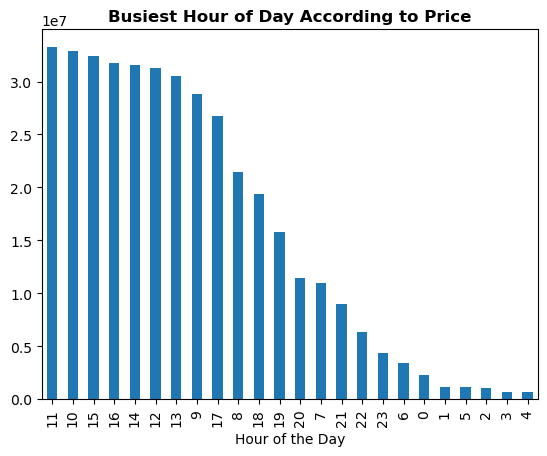

In [13]:
#bar chart for busiest hour of day according to the price
busiest_hours_price_bar = busiest_hours_price.plot.bar(legend = None)
plt.title('Busiest Hour of Day According to Price', fontweight = 'bold')
plt.xlabel('Hour of the Day')
plt.show()

11 is the busiest hour of the day according to the price.

In [14]:
busiest_hour_dept = df_all[df_all['order_hour_of_day'] == 11]

In [15]:
busiest_hour_dept['department'].value_counts(dropna = False)

produce            796168
dairy eggs         451953
snacks             254676
beverages          234133
frozen             177203
pantry             161397
bakery              98007
canned goods        93032
deli                89341
dry goods pasta     72273
household           63906
meat seafood        60280
breakfast           58733
personal care       36753
babies              31896
international       23101
alcohol             13807
pets                 7879
missing              5809
other                2977
bulk                 2918
Name: department, dtype: int64

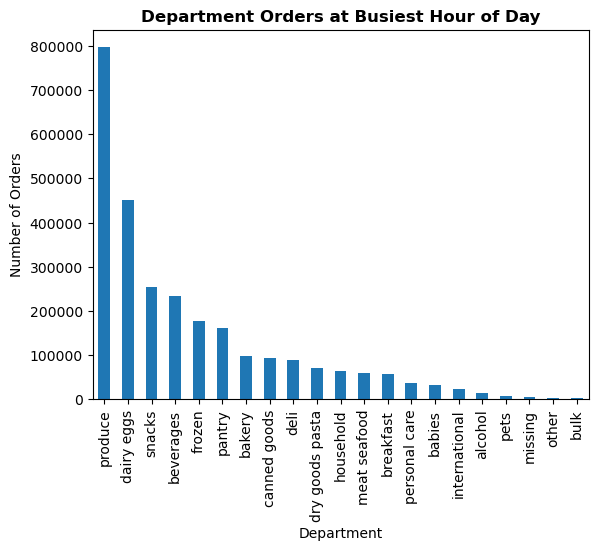

In [16]:
#bar chart busiest hour of day by department
dept_count = busiest_hour_dept['department'].value_counts(dropna=False)
busiest_dept = dept_count.plot.bar()
plt.title('Department Orders at Busiest Hour of Day', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.show()

3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [17]:
df_all['spending_flag'].value_counts(dropna = False)

Low spender     31771140
High spender      634901
Name: spending_flag, dtype: int64

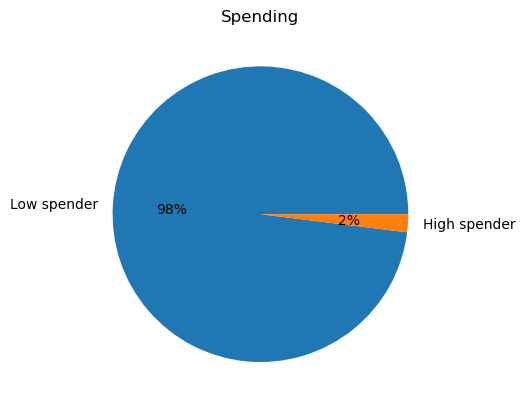

In [18]:
#pie chart based on spending
spending_flag_pie = df_all['spending_flag'].value_counts(dropna = False).plot.pie(title = 'Spending', label = '', autopct = ('%1.f%%'))

4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [19]:
df_all['department'].value_counts(dropna = False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           704111
personal care       447629
babies              423802
international       269253
alcohol             153743
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

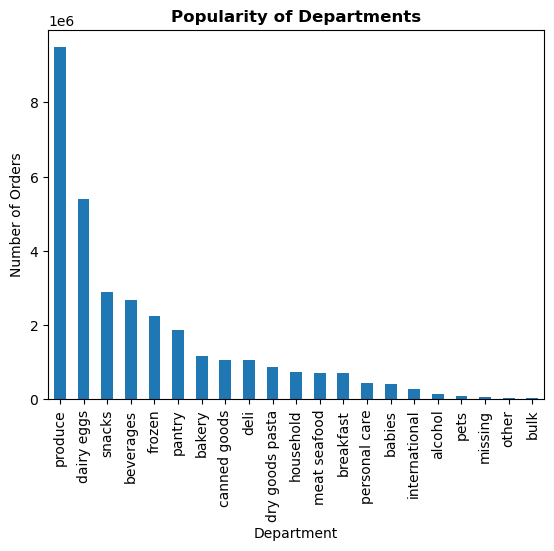

In [20]:
#bar chart for departments with the highest frequency of product orders
popular_dept_count = df_all['department'].value_counts(dropna=False)
popular_dept = popular_dept_count.plot.bar()
plt.title('Popularity of Departments', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.show()

5. The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example:

5b. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

In [21]:
df_all['order_frequency_flag'].value_counts(dropna = False)

Frequent customer        21560324
Regular customer          7209005
Non-frequent customer     3636707
NaN                             5
Name: order_frequency_flag, dtype: int64

In [22]:
loyalty_freq = pd.crosstab(df_all['loyalty_flag'], df_all['order_frequency_flag'], dropna = False)

In [23]:
loyalty_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,10280263,0,4133
New customer,1648597,2725192,1870456
Regular customer,9631464,911515,5334416


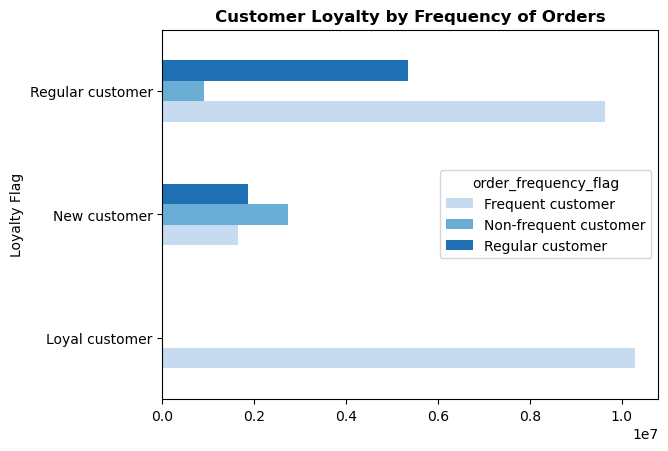

In [24]:
#bar chart customer loyalty by frequency of orders
loyalty_freq_bar = loyalty_freq.plot.barh(color = sns.color_palette('Blues', 3))
plt.title('Customer Loyalty by Frequency of Orders', fontweight = 'bold')
plt.ylabel('Loyalty Flag')
plt.show()

There are fewer new customers.
The loyal customers are clearly the customers that shop at the most frequent rates. 

5c. Are there differences in ordering habits based on a customer’s loyalty status?

In [26]:
df_all['loyalty_flag'].value_counts(dropna = False)

Regular customer    15877395
Loyal customer      10284396
New customer         6244250
Name: loyalty_flag, dtype: int64

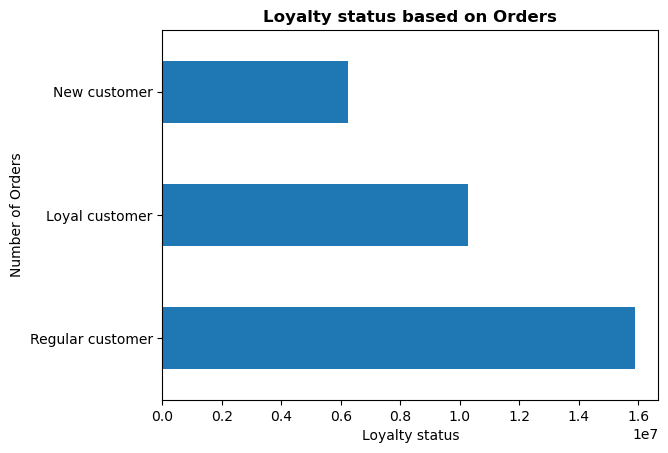

In [27]:
#bar chart based on loyalty status
loyalty_status = df_all['loyalty_flag'].value_counts(dropna=False)
loyalty_status_habits = loyalty_status.plot.barh()
plt.title('Loyalty status based on Orders', fontweight='bold')
plt.xlabel('Loyalty status')
plt.ylabel('Number of Orders')
plt.show()

It is clear that the regular customers order the most.

5d. Are there differences in ordering habits based on a customer’s region?

In [28]:
#customer orders by region
df_all['region'].value_counts(dropna = False)

South        10792300
West          8293217
Midwest       7597585
Northeast     5722939
Name: region, dtype: int64

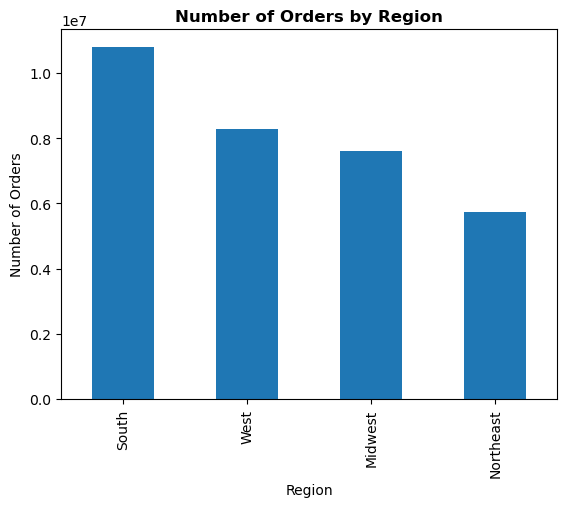

In [29]:
#bar chart number of orders broken down by regions
region_orders_count = df_all['region'].value_counts(dropna=False)
region_orders = region_orders_count.plot.bar()
plt.title('Number of Orders by Region', fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.show()

The South region has the highest number of orders.

5e. Is there a connection between age and family status in terms of ordering habits? 

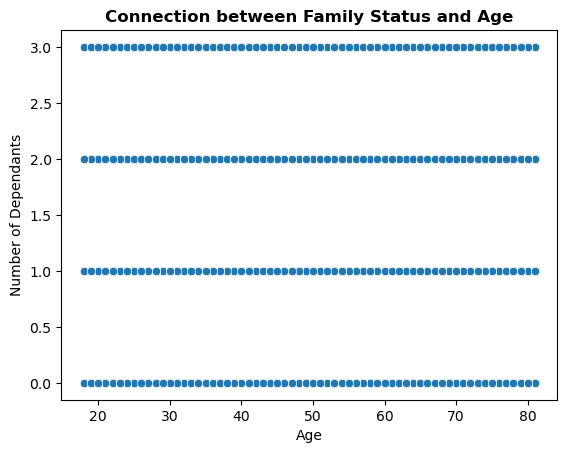

In [31]:
#scatterplot for family status and age
age_family = sns.scatterplot(x = 'age', y = 'number_dependants',data = df_all)
plt.xlabel('Age')
plt.ylabel('Number of Dependants')
plt.title('Connection between Family Status and Age', fontweight = 'bold')
plt.show()

In [32]:
#export visualizations
busiest_days.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/busiest_day_of_week.png')

In [33]:
busiest_hours.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/busiest_hours_of_day.png')

In [34]:
busiest_hours_price_bar.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/busiest_hours_price_bar.png')

In [35]:
busiest_dept.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/busiest_dept.png')

In [36]:
spending_flag_pie.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/spending_flag_pie.png')

In [37]:
popular_dept.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/popular_dept.png')

In [38]:
loyalty_freq_bar.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/loyalty_freq_distribution.png')

In [39]:
loyalty_status_habits.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/loyalty_status_habits.png')

In [40]:
region_orders.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/region_orders.png')

In [41]:
age_family.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/age_family.png')